<a href="https://colab.research.google.com/github/amirmafzali/Neural_network-and-deep-learning_course/blob/main/Air-pollution%20forecasting%20by%20hybrid%20CNN-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [55]:
aot = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
cha = pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv')
din = pd.read_csv('/content/PRSA_Data_Dingling_20130301-20170228.csv')
don = pd.read_csv('/content/PRSA_Data_Dongsi_20130301-20170228.csv')
gua = pd.read_csv('/content/PRSA_Data_Guanyuan_20130301-20170228.csv')
guc = pd.read_csv('/content/PRSA_Data_Gucheng_20130301-20170228.csv')
hua = pd.read_csv('/content/PRSA_Data_Huairou_20130301-20170228.csv')
non = pd.read_csv('/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shu = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')
tia = pd.read_csv('/content/PRSA_Data_Tiantan_20130301-20170228.csv')
wan = pd.read_csv('/content/PRSA_Data_Wanliu_20130301-20170228.csv')
wansh = pd.read_csv('/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [56]:
wd = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5,
}


aot['wd']=aot['wd'].map(wd)

date = aot[['year','month','day','hour']]
aot = aot.drop(['No','year','month','day','hour','station'],axis=1)

aot.head(10)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.4
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.7
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,5.6
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.1
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.0
5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,0.0,3.7
6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,22.5,2.5
7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,337.5,3.8
8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,337.5,4.1
9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,0.0,2.6


In [57]:
aot.isnull().sum()

PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64

In [58]:
aot = aot.interpolate(method ='linear')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f93aa6eb4f0>,
      dtype=object)

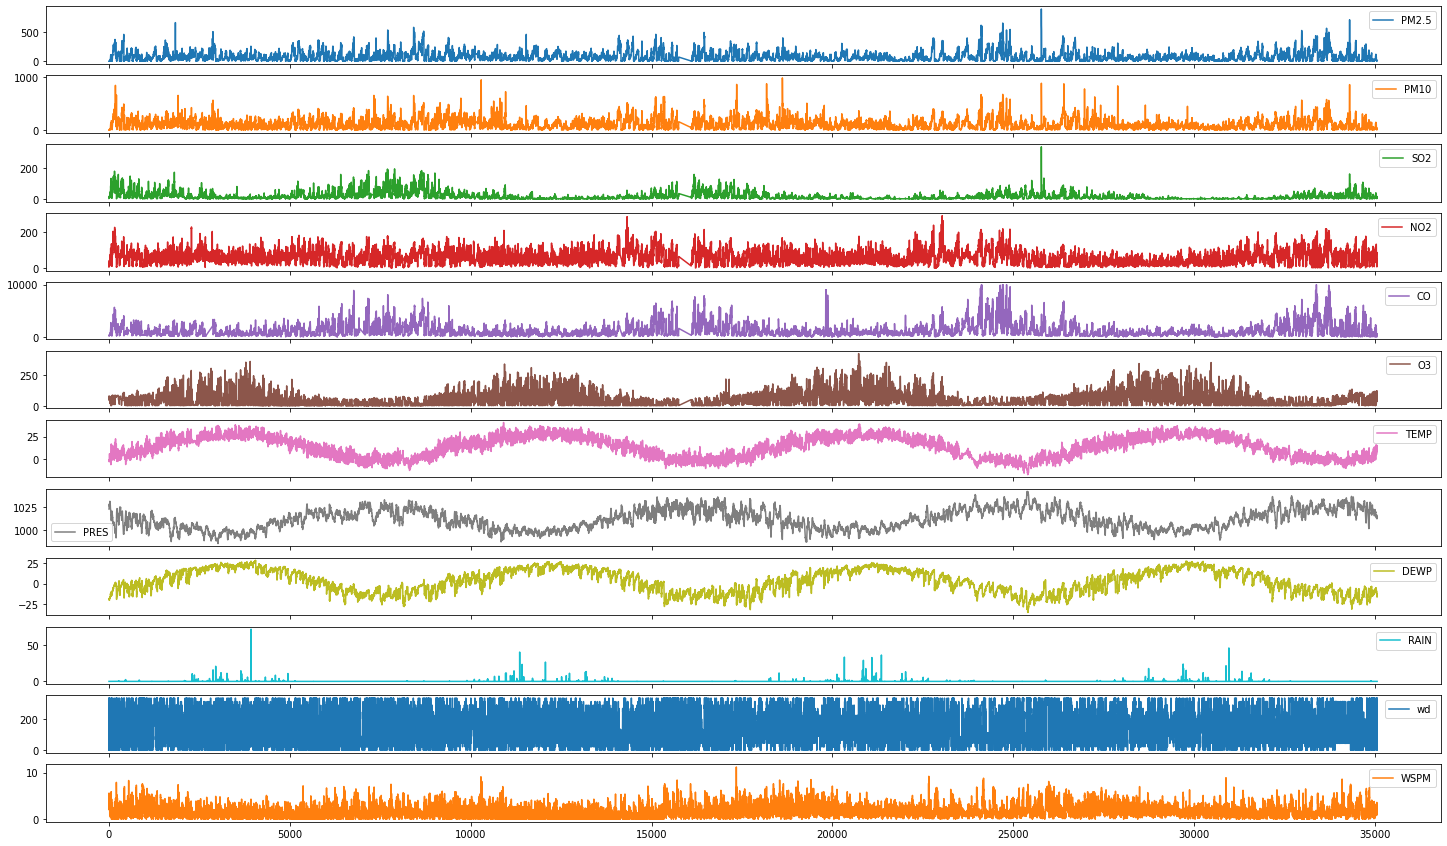

In [59]:
aot.plot(subplots=True,figsize=(25,15))

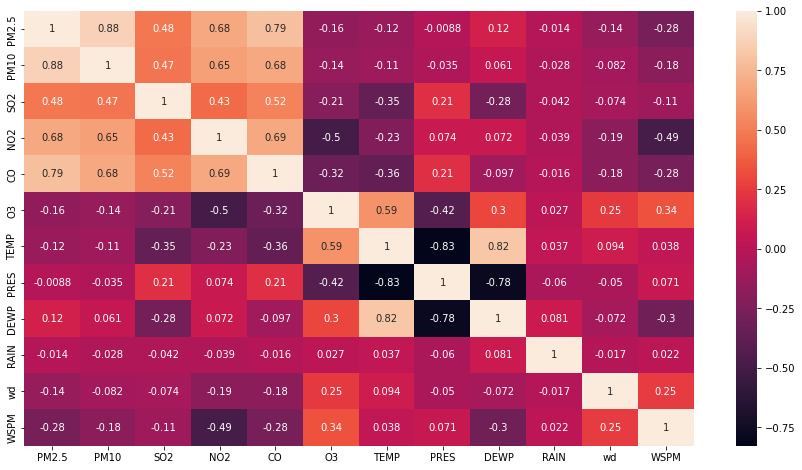

In [60]:
corr_matrix = aot.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [61]:
aot = aot.drop(['SO2','NO2','O3'],axis=1)

In [62]:
cha_pm = cha[['PM2.5']]
cha_pm.rename(columns = {'PM2.5':'PM2.5_cha'}, inplace = True)

din_pm = din[['PM2.5']]
din_pm.rename(columns = {'PM2.5':'PM2.5_din'}, inplace = True)

don_pm = don[['PM2.5']]
don_pm.rename(columns = {'PM2.5':'PM2.5_don'}, inplace = True)

gua_pm = gua[['PM2.5']]
gua_pm.rename(columns = {'PM2.5':'PM2.5_gua'}, inplace = True)

guc_pm = guc[['PM2.5']]
guc_pm.rename(columns = {'PM2.5':'PM2.5_guc'}, inplace = True)

hua_pm = hua[['PM2.5']]
hua_pm.rename(columns = {'PM2.5':'PM2.5_hua'}, inplace = True)

non_pm = non[['PM2.5']]
non_pm.rename(columns = {'PM2.5':'PM2.5_non'}, inplace = True)

shu_pm = shu[['PM2.5']]
shu_pm.rename(columns = {'PM2.5':'PM2.5_shu'}, inplace = True)

tia_pm = tia[['PM2.5']]
tia_pm.rename(columns = {'PM2.5':'PM2.5_tia'}, inplace = True)

wan_pm = wan[['PM2.5']]
wan_pm.rename(columns = {'PM2.5':'PM2.5_wan'}, inplace = True)

wansh_pm = wansh[['PM2.5']]
wansh_pm.rename(columns = {'PM2.5':'PM2.5_wansh'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [63]:
cha_pm

,PM2.5_cha
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
35059,28.0
35060,12.0
35061,7.0
35062,11.0


In [64]:
cha_pm = cha_pm.interpolate(method ='linear')
din_pm = din_pm.interpolate(method ='linear')
don_pm = don_pm.interpolate(method ='linear')
gua_pm = gua_pm.interpolate(method ='linear')
guc_pm = guc_pm.interpolate(method ='linear')
hua_pm = hua_pm.interpolate(method ='linear')
non_pm = non_pm.interpolate(method ='linear')
shu_pm = shu_pm.interpolate(method ='linear')
tia_pm = tia_pm.interpolate(method ='linear')
wan_pm = wan_pm.interpolate(method ='linear')
wansh_pm = wansh_pm.interpolate(method ='linear')

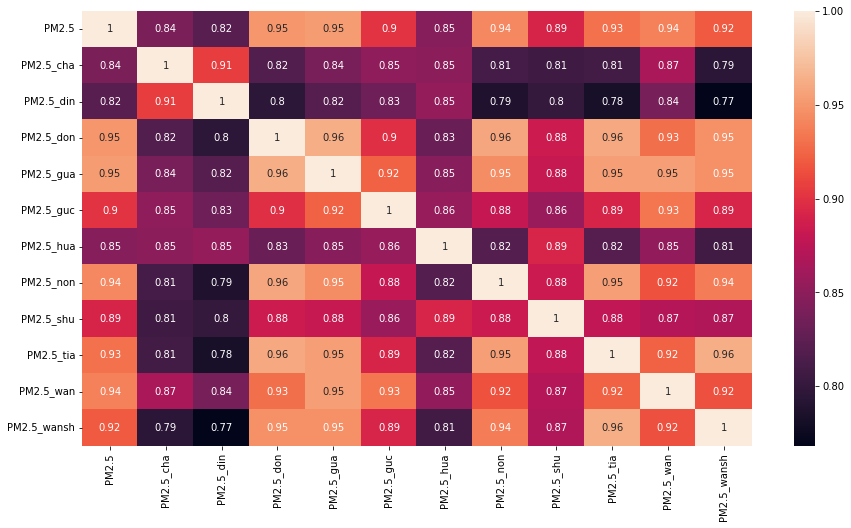

In [65]:
df_1 = aot['PM2.5']
df_2 = cha_pm['PM2.5_cha']
df_3 = din_pm['PM2.5_din']
df_4 = don_pm['PM2.5_don']
df_5 = gua_pm['PM2.5_gua']
df_6 = guc_pm['PM2.5_guc']
df_7 = hua_pm['PM2.5_hua']
df_8 = non_pm['PM2.5_non']
df_9 = shu_pm['PM2.5_shu']
df_10 = tia_pm['PM2.5_tia']
df_11 = wan_pm['PM2.5_wan']
df_12 = wansh_pm['PM2.5_wansh']

corr_matrix = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12],axis=1).corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [66]:
df = pd.concat([aot,cha_pm,din_pm,don_pm,gua_pm,guc_pm,hua_pm,non_pm,shu_pm,tia_pm,wan_pm,wansh_pm],axis=1)

In [67]:
scaler = MinMaxScaler()

In [68]:
df_1 = scaler.fit_transform(df)

In [69]:
df_2 = pd.DataFrame(df_1,columns=df.columns)

In [70]:
df_2

,PM2.5,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM,PM2.5_cha,PM2.5_din,PM2.5_don,PM2.5_gua,PM2.5_guc,PM2.5_hua,PM2.5_non,PM2.5_shu,PM2.5_tia,PM2.5_wan,PM2.5_wansh
0,0.001117,0.002037,0.020202,0.280977,0.661319,0.258621,0.0,1.000000,0.392857,0.001136,0.001139,0.008174,0.002950,0.005208,0.006579,0.003563,0.001065,0.003667,0.006283,0.006024
1,0.005587,0.006110,0.020202,0.273997,0.664884,0.268025,0.0,0.000000,0.419643,0.001136,0.004556,0.001362,0.002950,0.005208,0.002632,0.007126,0.010650,0.003667,0.007330,0.008032
2,0.004469,0.005092,0.020202,0.273997,0.670232,0.268025,0.0,1.000000,0.500000,0.001136,0.002278,0.005450,0.001475,0.003906,0.002632,0.001188,0.012780,0.003667,0.001047,0.005020
3,0.003352,0.004073,0.020202,0.268761,0.688057,0.249216,0.0,0.933333,0.276786,0.001136,0.003417,0.000000,0.001475,0.005208,0.001316,0.003563,0.010650,0.003667,0.009424,0.005020
4,0.000000,0.001018,0.020202,0.258290,0.700535,0.247649,0.0,0.000000,0.178571,0.001136,0.002278,0.000000,0.001475,0.003906,0.001316,0.003563,0.010650,0.002445,0.001047,0.005020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.010056,0.027495,0.030303,0.511344,0.491979,0.299373,0.0,0.933333,0.214286,0.029545,0.009112,0.017711,0.016224,0.015625,0.018421,0.014252,0.026624,0.020782,0.009424,0.008032
35060,0.011173,0.035642,0.040404,0.495637,0.493761,0.316614,0.0,0.866667,0.080357,0.011364,0.011390,0.020436,0.026549,0.032552,0.025000,0.019002,0.047923,0.009780,0.013613,0.010040
35061,0.014525,0.035642,0.060606,0.481675,0.504456,0.344828,0.0,0.933333,0.098214,0.005682,0.006834,0.027248,0.020649,0.026042,0.019737,0.015439,0.017039,0.018337,0.011518,0.011044
35062,0.020112,0.042770,0.060606,0.476440,0.508021,0.351097,0.0,1.000000,0.107143,0.010227,0.007973,0.027248,0.013274,0.009115,0.011842,0.010689,0.017039,0.014670,0.010471,0.009036


In [71]:
df = pd.concat([date,df_2],axis=1)

In [72]:
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour']], format='%Y %m %d %H')
df = df.drop(columns=['year', 'month', 'day', 'hour'])

In [73]:
df.to_csv(r'/content/DATASET.csv')

In [74]:
df

,PM2.5,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM,PM2.5_cha,PM2.5_din,PM2.5_don,PM2.5_gua,PM2.5_guc,PM2.5_hua,PM2.5_non,PM2.5_shu,PM2.5_tia,PM2.5_wan,PM2.5_wansh
2013-03-01 00:00:00,0.001117,0.002037,0.020202,0.280977,0.661319,0.258621,0.0,1.000000,0.392857,0.001136,0.001139,0.008174,0.002950,0.005208,0.006579,0.003563,0.001065,0.003667,0.006283,0.006024
2013-03-01 01:00:00,0.005587,0.006110,0.020202,0.273997,0.664884,0.268025,0.0,0.000000,0.419643,0.001136,0.004556,0.001362,0.002950,0.005208,0.002632,0.007126,0.010650,0.003667,0.007330,0.008032
2013-03-01 02:00:00,0.004469,0.005092,0.020202,0.273997,0.670232,0.268025,0.0,1.000000,0.500000,0.001136,0.002278,0.005450,0.001475,0.003906,0.002632,0.001188,0.012780,0.003667,0.001047,0.005020
2013-03-01 03:00:00,0.003352,0.004073,0.020202,0.268761,0.688057,0.249216,0.0,0.933333,0.276786,0.001136,0.003417,0.000000,0.001475,0.005208,0.001316,0.003563,0.010650,0.003667,0.009424,0.005020
2013-03-01 04:00:00,0.000000,0.001018,0.020202,0.258290,0.700535,0.247649,0.0,0.000000,0.178571,0.001136,0.002278,0.000000,0.001475,0.003906,0.001316,0.003563,0.010650,0.002445,0.001047,0.005020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,0.010056,0.027495,0.030303,0.511344,0.491979,0.299373,0.0,0.933333,0.214286,0.029545,0.009112,0.017711,0.016224,0.015625,0.018421,0.014252,0.026624,0.020782,0.009424,0.008032
2017-02-28 20:00:00,0.011173,0.035642,0.040404,0.495637,0.493761,0.316614,0.0,0.866667,0.080357,0.011364,0.011390,0.020436,0.026549,0.032552,0.025000,0.019002,0.047923,0.009780,0.013613,0.010040
2017-02-28 21:00:00,0.014525,0.035642,0.060606,0.481675,0.504456,0.344828,0.0,0.933333,0.098214,0.005682,0.006834,0.027248,0.020649,0.026042,0.019737,0.015439,0.017039,0.018337,0.011518,0.011044
2017-02-28 22:00:00,0.020112,0.042770,0.060606,0.476440,0.508021,0.351097,0.0,1.000000,0.107143,0.010227,0.007973,0.027248,0.013274,0.009115,0.011842,0.010689,0.017039,0.014670,0.010471,0.009036


In [104]:
data = np.array(df)

In [105]:
data.shape

(35064, 20)

In [106]:
X = []
Y = []

lag_hour = 1*24

for i in range (lag_hour , len(data)):
  X.append(data[i-lag_hour:i,:])
  Y.append(data[i,:1])

X = np.array(X)
Y = np.array(Y)

print('X.shape : ',X.shape,'\nY.shape : ',Y.shape)

X.shape :  (35040, 24, 20) 
Y.shape :  (35040, 1)


In [107]:
print(X[0][0],'\n\n',Y[0]) 

[0.00111732 0.00203666 0.02020202 0.28097731 0.66131907 0.25862069
 0.         1.         0.39285714 0.00113636 0.00113895 0.00817439
 0.00294985 0.00520833 0.00657895 0.00356295 0.00106496 0.00366748
 0.00628272 0.0060241 ] 

 [0.02122905]


In [108]:
print(X[1][0],'\n\n',Y[1]) 

[0.00558659 0.00610998 0.02020202 0.27399651 0.66488414 0.26802508
 0.         0.         0.41964286 0.00113636 0.00455581 0.0013624
 0.00294985 0.00520833 0.00263158 0.00712589 0.01064963 0.00366748
 0.00732984 0.00803213] 

 [0.0122905]


In [115]:
X_train = X[:28032]
X_test = X[28032:]
Y_train = Y[:28032]
Y_test = Y[28032:]

print('X_train : ',X_train.shape,'\nY_train : ',Y_train.shape,'\nX_test  : ',X_test.shape,'\nY_test  : ',Y_test.shape)

X_train :  (28032, 24, 20) 
Y_train :  (28032, 1) 
X_test  :  (7008, 24, 20) 
Y_test  :  (7008, 1)


In [116]:
model=keras.models.Sequential([
    
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        activation='relu', input_shape=(24,20),
                        padding='causal'),

    keras.layers.BatchNormalization(),
    
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        activation='relu', padding='causal'),
                        
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv1D(filters=32, kernel_size=3,
                        activation='relu', padding='causal'),

    keras.layers.MaxPool1D(pool_size=3),

    keras.layers.LSTM(100,return_sequences=True),

    keras.layers.Dropout(0.2),

    keras.layers.LSTM(50),

    keras.layers.Dropout(0.3),

    keras.layers.Dense(1,activation='relu')
])

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 24, 64)            3904      
                                                                 
 batch_normalization_6 (Batc  (None, 24, 64)           256       
 hNormalization)                                                 
                                                                 
 conv1d_10 (Conv1D)          (None, 24, 64)            12352     
                                                                 
 batch_normalization_7 (Batc  (None, 24, 64)           256       
 hNormalization)                                                 
                                                                 
 conv1d_11 (Conv1D)          (None, 24, 32)            6176      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 8, 32)           

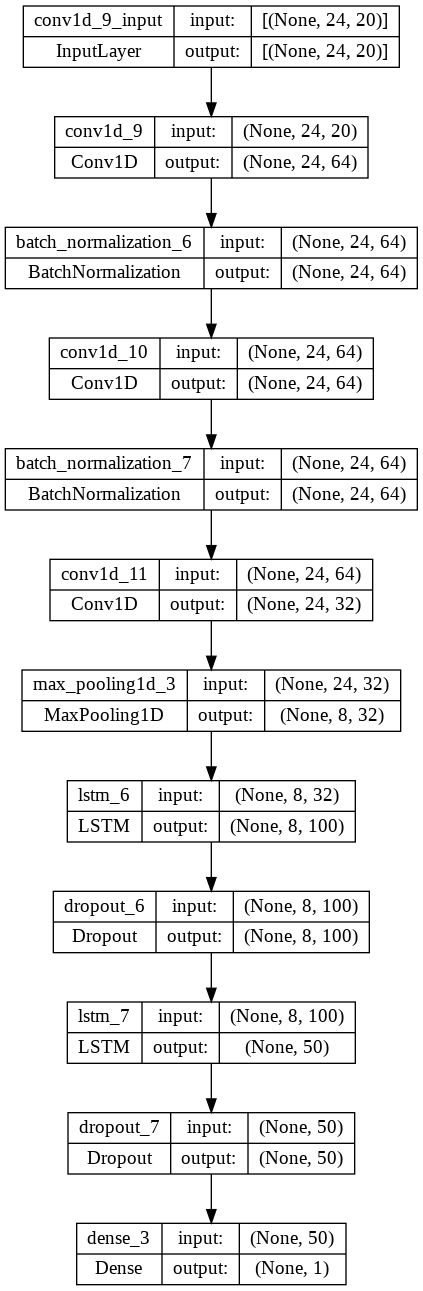

In [118]:
model.compile(optimizer='adam',loss='mean_squared_error')

tf.keras.utils.plot_model(model=model, show_shapes=True)

In [120]:
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=50, min_delta=1e-3 ,restore_best_weights=True)

model = model.fit(X_train,Y_train, 
                                    validation_data=(X_test,Y_test),
                                    epochs=200,
                                    batch_size=32,
                                    verbose=2,
                                    callbacks=[early_stopping])

Epoch 1/200
876/876 - 14s - loss: 0.0040 - val_loss: 0.0011 - 14s/epoch - 16ms/step
Epoch 2/200
876/876 - 11s - loss: 0.0011 - val_loss: 5.4772e-04 - 11s/epoch - 13ms/step
Epoch 3/200
876/876 - 11s - loss: 8.7513e-04 - val_loss: 5.0932e-04 - 11s/epoch - 13ms/step
Epoch 4/200
876/876 - 11s - loss: 7.9059e-04 - val_loss: 5.1016e-04 - 11s/epoch - 13ms/step
Epoch 5/200
876/876 - 11s - loss: 7.2383e-04 - val_loss: 5.4544e-04 - 11s/epoch - 13ms/step
Epoch 6/200
876/876 - 13s - loss: 6.5999e-04 - val_loss: 5.2948e-04 - 13s/epoch - 15ms/step
Epoch 7/200
876/876 - 12s - loss: 6.5182e-04 - val_loss: 4.4826e-04 - 12s/epoch - 13ms/step
Epoch 8/200
876/876 - 11s - loss: 6.7699e-04 - val_loss: 4.0533e-04 - 11s/epoch - 13ms/step
Epoch 9/200
876/876 - 12s - loss: 6.0920e-04 - val_loss: 5.3977e-04 - 12s/epoch - 14ms/step
Epoch 10/200
876/876 - 11s - loss: 5.9853e-04 - val_loss: 4.0282e-04 - 11s/epoch - 13ms/step
Epoch 11/200
876/876 - 11s - loss: 5.8730e-04 - val_loss: 4.3071e-04 - 11s/epoch - 13ms/ste

Text(0, 0.5, 'MSE')

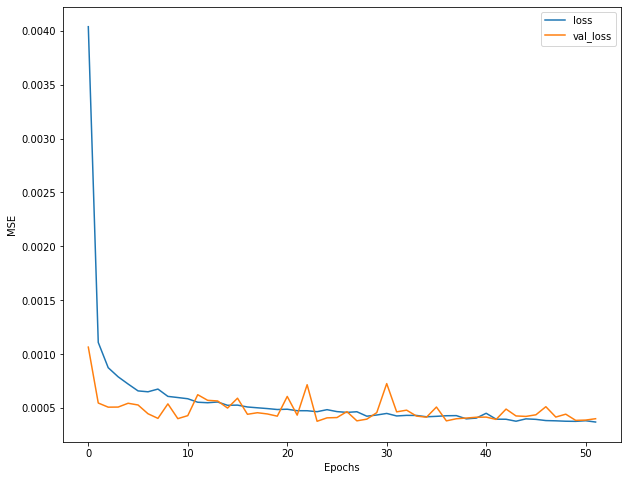

In [182]:
plt.figure(figsize=(10,8))
plt.plot(model.history["loss"],label="loss")
plt.plot(model.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [ ]:
Y_pred = model.predict(X_test)

In [131]:
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_test,Y_pred)
R2 = r2_score(Y_test,Y_pred)

print('MSE  : ',MSE,'\nRMSE : ',RMSE,'\nMAE  : ',MAE,'\nR2   : ',R2)

MSE  :  0.000628209987643743 
RMSE :  0.02506411753171739 
MAE  :  0.0161369846441724 
R2   :  0.9280248256469118


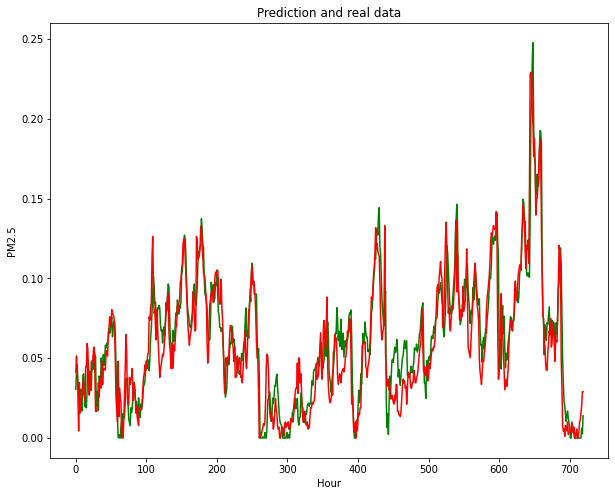

In [181]:
plt.figure(figsize=(10,8))
plt.plot(Y_pred[:720,:], color= 'green')
plt.plot(Y_test[:720,:] , color = 'red')
plt.title("Prediction and real data")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()